# Topics in Artificial Intelligence
# Assignment 1: Intriduction to Deep Learning


In Section 1 of the notebook, we have implemented a single-layer supervised neural network for you, so no coding is necessary for this section. Sections 2 and 3 are where your coding expertise is needed, and you'll also be expected to answer specific questions. Section 4 is crafted to familiarize you with PyTorch. Beyond that, its primary purpose is to equip you with essential debugging strategies for training neural networks.

# Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[$$\widehat{y}$$_1,\widehat{y}_2,\widehat{y}_3]$:

<br>
<center>
<img src="./images/1_layer_net.png" width="450">
</center>
<br>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be:

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\
  \widehat{y}_{2} \\
  \widehat{y}_{3}
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure.

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [ ]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)初始化
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001

    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias

    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[0.50097551 0.49932596 0.49988537]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[0.50039726 0.50050494 0.50184284]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[0.49967819 0.49975724 0.50132522]
 [0.49672204 0.5004112  0.50171508]]


## Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD).

In [ ]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## Backward-propagation (Backpropagation)

Backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network).

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them.

In [ ]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

    def backward(self, predictions, labels):#计算损失函数对预测值predictions的梯度
        num_samples = labels.shape[0]
        return 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)

    def forward(self, x):
        return np.dot(x, self.weight) + self.bias

    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)

    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams


# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)#线性层的输出
y_hat = sigmoid.forward(lin)#Sigmoid 激活层的输出，即神经网络的预测值
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)#损失函数对预测值 y_hat 的梯度
dlin = sigmoid.backward(lin, dy_hat)#Sigmoid 激活层对输入 lin 的梯度
dx1 = linear.backward(x1, dlin)#线性层对输入 x1 的梯度

print('\n num_samples = ' + str(y1.shape[0]))

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))#dW和dB：线性层的权重矩阵和偏置项的梯度
print('dB = ' + str(linear.gradBias))


 num_samples = 1

W = [[ 0.00246144 -0.02518595 -0.01416384]
 [ 0.0009403   0.0020745  -0.00560526]
 [-0.00537051 -0.00309394 -0.00483892]
 [ 0.00038759  0.01434568  0.01791079]]
B = [[-0.01710287 -0.00425923  0.0008498 ]]

x1    = [[1 2 2 3]]
lin   = [[-0.02233906  0.01155298  0.01952997]]
y_hat = [[0.49441547 0.50288821 0.50488234]]

loss = 0.18865637539709432

dy_hat = [[0.48883094 0.50577643 0.50976468]]
dlin   = [[0.12219249 0.12643989 0.12742902]]
dx1    = [[-0.00468862 -0.00033708 -0.00166405  0.00414358]]

dW = [[0.12219249 0.12643989 0.12742902]
 [0.24438498 0.25287977 0.25485804]
 [0.24438498 0.25287977 0.25485804]
 [0.36657747 0.37931966 0.38228705]]
dB = [[0.12219249 0.12643989 0.12742902]]


## Gradient checking

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$.

我们将使用数值近似方法***计算权重矩阵的梯度***，并将其与实际计算得到的梯度进行比较。


approxGradWeight 的计算：这部分代码用于验证 gradWeight 是否正确。通过数值逼近的方法，对每个权重项 wij 计算近似的梯度值 approxGradWeight[i, j]。具体而言，对于权重矩阵中的每个条目 wij，将其值增加一个很小的值 epsilon，然后计算此时的损失函数值 fw_epsilon。然后，通过计算 (fw_epsilon - fw) / epsilon，得到近似的梯度值 approxGradWeight[i, j]。

代码中的循环遍历了权重矩阵的每个元素，并进行了以下计算：


> 首先，我们计算了当前权重下的损失函数值 fw。

> 然后，我们微小地增加了权重值 epsilon，创建了一个新的线性层 shifted_linear，并计算了在新权重下的损失函数值 fw_epsilon。

> 最后，我们使用数值近似方法计算了当前权重元素的梯度，即 (fw_epsilon - fw) / epsilon。

In [ ]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)#输出值a1
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)#计算出相对于输入x的梯度dx

gradWeight = linear.gradWeight#线性层的权重梯度gradWeight
gradBias = linear.gradBias#偏置项梯度gradBias

#用于验证gradWeight是否正确
approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):#使用两个嵌套的循环遍历权重矩阵的每个元素
        # Compute f(w)计算原始权重矩阵下的损失函数值fw
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) #Loss function. 即criterion.forward(a1,y)
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)#其权重矩阵shifted_weight初始化为与原始线性层linear的权重矩阵相同
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon#每个元素都加epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y)#Loss function，即criterion.forward(a1_epsilon,y)
        # Compute (f(w + eps) - f(w)) / eps计算数值逼近得到的梯度值
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))
#如果gradWeight和approxGradWeight非常接近（在一定精度范围内），则可以认为计算的梯度是正确的。

gradWeight: [[ -2.97873643  -4.32752683  -5.63099061]
 [ -4.83726428  -7.02760767  -9.14434373]
 [-43.84088998 -63.69231793 -82.87663107]
 [ -6.78489964  -9.85714444 -12.82614529]]

approxGradWeight: [[ -2.97864645  -4.32749133  -5.63099414]
 [ -4.83702699  -7.02751403  -9.14435298]
 [-43.82136643 -63.6845707  -82.87731727]
 [ -6.78443275  -9.85696016 -12.82616339]]


## Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [ ]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate.

In [ ]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)#线性层，输入大小为4，输出大小为3
model['sigmoid'] = nn_Sigmoid()# sigmoid激活层
model['loss'] = nn_MSECriterion()# 均方误差损失函数

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]# 从输入数据集中获取一个样本，x中的第i行
        yi = y[i:i+1, :]# 从标签数据集中获取一个样本

        # Forward.
        a0 = model['linear'].forward(xi)# 使用线性层计算输出
        a1 = model['sigmoid'].forward(a0)# 使用sigmoid激活层计算输出
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)# 计算损失函数的梯度
        da0 = model['sigmoid'].backward(a0, da1)# 计算sigmoid激活层的
        model['linear'].backward(xi, da0) # 计算线性层的梯度

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.47292057
epoch[10] = 1.41799062
epoch[20] = 1.40611271
epoch[30] = 1.40164579
epoch[40] = 1.39867343
epoch[50] = 1.39653278
epoch[60] = 1.39507777
epoch[70] = 1.39403791
epoch[80] = 1.39324397
epoch[90] = 1.39261415
epoch[100] = 1.39210131
epoch[110] = 1.39167521
epoch[120] = 1.39131539
epoch[130] = 1.39100749
epoch[140] = 1.39074107
epoch[150] = 1.39050836
epoch[160] = 1.39030340
epoch[170] = 1.39012154
epoch[180] = 1.38995911
epoch[190] = 1.38981316
epoch[200] = 1.38968132
epoch[210] = 1.38956162
epoch[220] = 1.38945247
epoch[230] = 1.38935252
epoch[240] = 1.38926067
epoch[250] = 1.38917597
epoch[260] = 1.38909762
epoch[270] = 1.38902495
epoch[280] = 1.38895736
epoch[290] = 1.38889436
epoch[300] = 1.38883551
epoch[310] = 1.38878042
epoch[320] = 1.38872875
epoch[330] = 1.38868021
epoch[340] = 1.38863453
epoch[350] = 1.38859149
epoch[360] = 1.38855085
epoch[370] = 1.38851245
epoch[380] = 1.38847611
epoch[390] = 1.38844167


# Two-layer neural network with 1-hidden layer.
In the previous section, we constructed a single-layer neural network that accepted input vectors of size 4 and produced output vectors of size 3. In this section, your challenge is to adapt the code to train a two-layer network, which includes one hidden layer with a size determined by hidden_state_size. Please note that hidden_state_size is a variable parameter that you should be able to adjust.

<br>
<center>
<img src="images/2_layer_net.png" width="450">
</center>
<br>


## Implementing the network and SGD learning.
Please modify the code of Section "Stochastic Gradient Descent" to implement a two-layer network and the SGD training procedure for it.


In [ ]:
hidden_state_size=5
# Your code goes here.
learningRate = 0.1
model = {}
model['linear1'] = nn_Linear(4, hidden_state_size)  # 创建第一个线性层，输入大小为4，输出大小为hidden_state_size
model['sigmoid1'] = nn_Sigmoid()  # 创建第一个Sigmoid激活层
model['linear2'] = nn_Linear(hidden_state_size, 3)  # 创建第二个线性层，输入大小为hidden_state_size，输出大小为3
model['sigmoid2'] = nn_Sigmoid()  # 创建第二个Sigmoid激活层
model['loss'] = nn_MSECriterion()  # 创建均方误差损失函数

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]  # 提取输入数据矩阵x的第i行，作为输入xi
        yi = y[i:i+1, :]  # 提取标签数据矩阵y的第i行，作为标签yi

        # 前向传播
        a0 = model['linear1'].forward(xi)  # 输入xi经过第一个线性层得到a0
        a1 = model['sigmoid1'].forward(a0)  # a0经过第一个Sigmoid激活层得到a1
        a2 = model['linear2'].forward(a1)  # a1经过第二个线性层得到a2
        a3 = model['sigmoid2'].forward(a2)  # a2经过第二个Sigmoid激活层得到a3
        loss += model['loss'].forward(a3, yi)  # 计算损失函数值并累加

        # 反向传播
        da3 = model['loss'].backward(a3, yi)  # 计算输出层的梯度
        da2 = model['sigmoid2'].backward(a2, da3)  # 计算第二个隐藏层的梯度
        da1 = model['linear2'].backward(a1, da2)  # 更新第二个线性层的梯度
        da0 = model['sigmoid1'].backward(a0, da1)  # 计算第一个隐藏层的梯度
        model['linear1'].backward(xi, da0)  # 更新第一个线性层的梯度

        # 更新权重和偏置项
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

    if epoch % 10 == 0:
        print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))  # 打印每个epoch的平均损失函数值

epoch[0] = 1.49244501
epoch[10] = 1.47638573
epoch[20] = 1.43905686
epoch[30] = 1.41850230
epoch[40] = 1.41078143
epoch[50] = 1.40924472
epoch[60] = 1.40872217
epoch[70] = 1.40842702
epoch[80] = 1.40819842
epoch[90] = 1.40802235
epoch[100] = 1.40786318
epoch[110] = 1.40758188
epoch[120] = 1.40669413
epoch[130] = 1.40483711
epoch[140] = 1.39666695
epoch[150] = 1.37843149
epoch[160] = 1.37365538
epoch[170] = 1.37044867
epoch[180] = 1.36645212
epoch[190] = 1.35888846
epoch[200] = 1.34768534
epoch[210] = 1.33530414
epoch[220] = 1.30558107
epoch[230] = 1.28926920
epoch[240] = 1.28254576
epoch[250] = 1.27976437
epoch[260] = 1.27836003
epoch[270] = 1.27760882
epoch[280] = 1.27715369
epoch[290] = 1.27684796
epoch[300] = 1.27662166
epoch[310] = 1.27643704
epoch[320] = 1.27627663
epoch[330] = 1.27613225
epoch[340] = 1.27599953
epoch[350] = 1.27587587
epoch[360] = 1.27575971
epoch[370] = 1.27565008
epoch[380] = 1.27554636
epoch[390] = 1.27544813


## Gradient checking.
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section "Gradient checking" above.

In [ ]:
# Select a single data pair (x, y) for gradient checking.
data_index =0
xi=x[data_index:data_index + 1]
yi=y[data_index:data_index + 1]

# Forward-propagation.
a0=model['linear1'].forward(xi)
a1=model['sigmoid1'].forward(a0)
a2=model['linear2'].forward(a1)
a3=model['sigmoid2'].forward(a2)
loss=model['loss'].forward(a3, yi)

# Backward-propagation.
da3=model['loss'].backward(a3, yi)
da2=model['sigmoid2'].backward(a2, da3)
da1=model['linear2'].backward(a1, da2)
da0=model['sigmoid1'].backward(a0, da1)
dx=model['linear1'].backward(xi, da0)

gradWeight1=model['linear1'].gradWeight
gradBias1=model['linear1'].gradBias
gradWeight2=model['linear2'].gradWeight
gradBias2=model['linear2'].gradBias

approxGradWeight1 = np.zeros_like(model['linear1'].weight)
approxGradBias1 = np.zeros_like(model['linear1'].bias)
approxGradWeight2 = np.zeros_like(model['linear2'].weight)
approxGradBias2 = np.zeros_like(model['linear2'].bias)

# Verify gradWeight1 using numerical gradient approximation.
epsilon = 0.0001
for i in range(model['linear1'].weight.shape[0]):
    for j in range(model['linear1'].weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        # Compute f(w + eps)
        shifted_weight = np.copy(model['linear1'].weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear1 = nn_Linear(4, 5)
        shifted_linear1.bias =model['linear1'].bias
        shifted_linear1.weight = shifted_weight
        fw_epsilon = criterion.forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(shifted_linear1.forward(xi)))), yi)
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight1[i, j] = (fw_epsilon - fw) / epsilon

# Verify gradWeight2 using numerical gradient approximation.
for i in range(model['linear2'].weight.shape[0]):
    for j in range(model['linear2'].weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        # Compute f(w + eps)
        shifted_weight = np.copy(model['linear2'].weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear2=nn_Linear(5, 3)
        shifted_linear2.bias=model['linear2'].bias
        shifted_linear2.weight=shifted_weight
        fw_epsilon = criterion.forward(model['sigmoid2'].forward(shifted_linear2.forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight2[i, j] = (fw_epsilon - fw) / epsilon

# Print the gradients for comparison.
print('gradWeight1:\n', gradWeight1)
print('\napproxGradWeight1:\n', approxGradWeight1)
print('\ngradWeight2:\n', gradWeight2)
print('\napproxGradWeight2:\n', approxGradWeight2)

gradWeight1:
 [[ 3.24547822e-08  0.00000000e+00  7.79130789e-13 -2.05762510e-10
  -1.98621581e-09]
 [ 2.35577268e-08  0.00000000e+00  5.65542242e-13 -1.49355401e-10
  -1.44172064e-09]
 [ 3.04499039e-08  0.00000000e+00  7.31000366e-13 -1.93051632e-10
  -1.86351830e-09]
 [ 4.04484216e-08  0.00000000e+00  9.71031341e-13 -2.56441985e-10
  -2.47542239e-09]]

approxGradWeight1:
 [[ 3.24473781e-08  0.00000000e+00  0.00000000e+00 -2.04281037e-10
  -1.98507877e-09]
 [ 2.35522712e-08  0.00000000e+00  0.00000000e+00 -1.50990331e-10
  -1.44106949e-09]
 [ 3.04423153e-08  0.00000000e+00  0.00000000e+00 -1.95399252e-10
  -1.86295424e-09]
 [ 4.04387634e-08  0.00000000e+00  0.00000000e+00 -2.57571742e-10
  -2.47357690e-09]]

gradWeight2:
 [[ 6.16432426e-05 -2.22202271e-04 -8.37256412e-06]
 [ 6.16439729e-05 -2.22204904e-04 -8.37266330e-06]
 [ 6.16439728e-05 -2.22204903e-04 -8.37266330e-06]
 [ 6.16439699e-05 -2.22204893e-04 -8.37266290e-06]
 [ 6.16439168e-05 -2.22204702e-04 -8.37265569e-06]]

approxGradW

## Activation functions.

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [ ]:
# Rectified linear unit
class nn_ReLU:
    def forward(self, x):
      # Forward pass.
      return np.maximum(0, x)
    def backward(self, x, grad_output):
      # Backward pass
      relu_grad = np.zeros_like(x)
      relu_grad[x > 0] = 1
      return relu_grad * grad_output
# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
      # Forward pass.
      return np.tanh(x)
    def backward(self, x, grad_output):
      # Backward pass
      tanh_grad = 1 - np.tanh(x) ** 2
      return tanh_grad * grad_output

In [ ]:
# Example usage
x = np.array([[-1, 0, 1]])

relu = nn_ReLU()
relu_output = relu.forward(x)
print("ReLU output:", relu_output)

relu_grad_output = np.array([[1, 2, 3]])
relu_grad_input = relu.backward(x, relu_grad_output)
print("ReLU gradient:", relu_grad_input)

tanh = nn_Tanh()
tanh_output = tanh.forward(x)
print("Tanh output:", tanh_output)

tanh_grad_output = np.array([[1, 2, 3]])
tanh_grad_input = tanh.backward(x, tanh_grad_output)
print("Tanh gradient:", tanh_grad_input)

ReLU output: [[0 0 1]]
ReLU gradient: [[0 0 3]]
Tanh output: [[-0.76159416  0.          0.76159416]]
Tanh gradient: [[0.41997434 2.         1.25992302]]


## Loss functions.

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$.

$$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = - \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [ ]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
      # Forward pass.
      epsilon = 1e-7  # small value to avoid division by zero
      n = predictions.shape[0]
      loss = -1 / n * np.sum(labels * np.log(predictions + epsilon) + (1 - labels) * np.log(1 - predictions + epsilon))
      return loss

    def backward(self, predictions, labels):
      # Backward pass.
      epsilon = 1e-7  # small value to avoid division by zero
      n = predictions.shape[0]
      grad = -1 / n * (labels / (predictions + epsilon) - (1 - labels) / (1 - predictions + epsilon))
      return grad

In [ ]:
# Example usage
predictions = np.array([[0.2, 0.8, 0.6]])
labels = np.array([[0, 1, 1]])

bce_criterion = nn_BCECriterion()
loss = bce_criterion.forward(predictions, labels)
print("Binary Cross Entropy Loss:", loss)

grad = bce_criterion.backward(predictions, labels)
print("Gradient:", grad)

Binary Cross Entropy Loss: 0.9571123097277732
Gradient: [[ 1.24999984 -1.24999984 -1.66666639]]


<b>Optional</b>: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each sample in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch. This means that for a batch of size 32, the sum will be over the 32 samples).</span>

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

dataset_size = 100

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

learning_rate = 0.01
hidden_state_size = 5
num_epochs =200
batch_size = 32

# Initialize weights and biases
weights_hidden = np.random.randn(x.shape[1], hidden_state_size)
bias_hidden = np.zeros((1, hidden_state_size))
weights_output = np.random.randn(hidden_state_size, y.shape[1])
bias_output = np.zeros((1, y.shape[1]))

# Stochastic Gradient Descent (SGD) loop
dataset_size = len(x)  # Assuming x is the input dataset
num_batches = int(np.ceil(dataset_size / batch_size))
for epoch in range(num_epochs):
    loss = 0
    for batch in range(num_batches):
      # Sample a random batch of (x, y) pairs from the dataset
      indices = np.random.choice(dataset_size, size=batch_size, replace=True)
      x_batch = x[indices]
      y_batch = y[indices]

      # Forward propagation
      hidden_input = np.dot(x_batch, weights_hidden) + bias_hidden
      hidden_output = nn_Sigmoid().forward(hidden_input)
      output = np.dot(hidden_output, weights_output) + bias_output

      # Compute loss
      loss += np.sum((output - y_batch) ** 2) / batch_size

      # Backward propagation
      grad_output = 2 * (output - y_batch) / batch_size
      grad_hidden = np.dot(grad_output, weights_output.T) * hidden_output * (1 - hidden_output)

      # Update weights and biases
      weights_output -= learning_rate * np.dot(hidden_output.T, grad_output)
      bias_output -= learning_rate * np.sum(grad_output, axis=0, keepdims=True)
      weights_hidden -= learning_rate * np.dot(x_batch.T, grad_hidden)
      bias_hidden -= learning_rate * np.sum(grad_hidden, axis=0, keepdims=True)

    if epoch % 10 == 0:
        print('epoch[%d] = %.8f' % (epoch, loss / num_batches))

epoch[0] = 7.32263624
epoch[10] = 1.86239122
epoch[20] = 1.71867649
epoch[30] = 1.64198351
epoch[40] = 1.51863370
epoch[50] = 1.46969815
epoch[60] = 1.56675946
epoch[70] = 1.58737560
epoch[80] = 1.46467029
epoch[90] = 1.47520115
epoch[100] = 1.41339176
epoch[110] = 1.56454908
epoch[120] = 1.47920098
epoch[130] = 1.53292294
epoch[140] = 1.48562516
epoch[150] = 1.51057629
epoch[160] = 1.54453828
epoch[170] = 1.46709604
epoch[180] = 1.37007101
epoch[190] = 1.45839356


# Behaviour of neural networks.

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples.

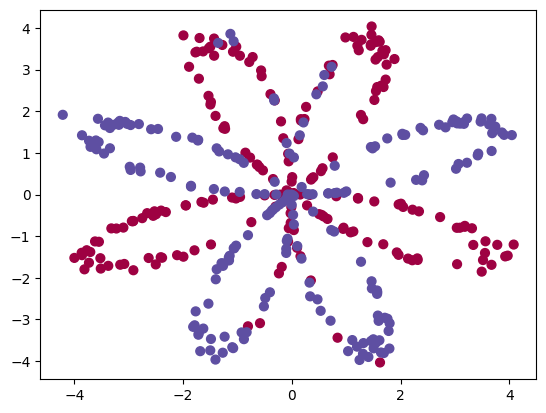

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets

def load_planar_dataset():
    np.random.seed(1)
    m = 400                # number of examples
    N = int(m/2)           # number of points per class
    D = 2                  # dimensionality
    X = np.zeros((m,D))    # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4                  # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset();

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section "Implementing the network and SGD learning" here, train it and then display the results.

In [ ]:
hidden_state_size = 1;

# Define the 2-layer network here (fill in yout code)
model = {}
model['linear1'] = nn_Linear(2,hidden_state_size)
model['linear2'] = nn_Linear(hidden_state_size,1)
model['sigmoid1'] = nn_Sigmoid()
model['sigmoid2'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.1
numberEpochs = 400

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        # Forward pass (fill in your code)
        xi=X.T[i:i+1,: ]
        yi=Y.T[i:i+1,: ]
        #xi=X[:, i:i+1]
        #yi=Y[:, i:i+1]
        a0 = model['linear1'].forward(xi)
        h0 = model['sigmoid1'].forward(a0)
        a1 = model['linear2'].forward(h0)
        h1 = model['sigmoid2'].forward(a1)
        loss += model['loss'].forward(h1, yi)

        # Backward pass (fill in your code)
        dh1 = model['loss'].backward(h1, yi)
        da1 = model['sigmoid2'].backward(a1, dh1)
        dh0 = model['linear2'].backward(h0, da1)
        da0 = model['sigmoid1'].backward(a0,dh0)
        model['linear1'].backward(xi, da0)
        # Update gradients (fill in your code)
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        model['linear2'].weight -= learningRate * model['linear2'].gradWeight
        model['linear2'].bias -= learningRate * model['linear2'].gradBias


    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))




%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):
    # Forward pass (fill in your code)
    xi=X.T[i:i+1,: ]
    a0 = model['linear1'].forward(xi)
    h0 = model['sigmoid1'].forward(a0)
    a1

epoch[0] = 0.13501438
epoch[10] = 0.18159347
epoch[20] = 0.18796785
epoch[30] = 0.18790691
epoch[40] = 0.18768770
epoch[50] = 0.18750936
epoch[60] = 0.18736442
epoch[70] = 0.18724430
epoch[80] = 0.18714308
epoch[90] = 0.18705659
epoch[100] = 0.18698183
epoch[110] = 0.18691656
epoch[120] = 0.18685906
epoch[130] = 0.18680801
epoch[140] = 0.18676237
epoch[150] = 0.18672131
epoch[160] = 0.18668415
epoch[170] = 0.18665035
epoch[180] = 0.18661947
epoch[190] = 0.18659113
epoch[200] = 0.18656501
epoch[210] = 0.18654087
epoch[220] = 0.18651847
epoch[230] = 0.18649763
epoch[240] = 0.18647819
epoch[250] = 0.18646000
epoch[260] = 0.18644294
epoch[270] = 0.18642691
epoch[280] = 0.18641182
epoch[290] = 0.18639758
epoch[300] = 0.18638412
epoch[310] = 0.18637138
epoch[320] = 0.18635930
epoch[330] = 0.18634782
epoch[340] = 0.18633691
epoch[350] = 0.18632652
epoch[360] = 0.18631661
epoch[370] = 0.18630716
epoch[380] = 0.18629812
epoch[390] = 0.18628948


## Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behaviout did network with largerr hidden state exhibit that the one with smaller one did not? Why?

In [ ]:
hidden_state_size =5;

# Define the 2-layer network here (fill in yout code)
model = {}
model['linear1'] = nn_Linear(2,hidden_state_size)
model['linear2'] = nn_Linear(hidden_state_size,1)
model['sigmoid1'] = nn_Sigmoid()
model['sigmoid2'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()
layer1 = nn_Linear(2,hidden_state_size)
layer2 = nn_Linear(hidden_state_size,1)

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.1
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):
        # Forward pass (fill in your code)
        xi=X.T[i:i+1,: ]
        yi=Y.T[i:i+1,: ]
        #xi=X[:, i:i+1]
        #yi=Y[:, i:i+1]
        a0 = model['linear1'].forward(xi)
        h0 = model['sigmoid1'].forward(a0)
        a1 = model['linear2'].forward(h0)
        h1 = model['sigmoid2'].forward(a1)
        loss += model['loss'].forward(h1, yi)

        # Backward pass (fill in your code)
        dh1 = model['loss'].backward(h1, yi)
        da1 = model['sigmoid2'].backward(a1, dh1)
        dh0 = model['linear2'].backward(h0, da1)
        da0 = model['sigmoid1'].backward(a0,dh0)
        model['linear1'].backward(xi, da0)
        # Update gradients (fill in your code)
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        model['linear2'].weight -= learningRate * model['linear2'].gradWeight
        model['linear2'].bias -= learningRate * model['linear2'].gradBias


    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))




%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):
    # Forward pass (fill in your code)
    xi=X.T[i:i+1,: ]
    a0 = model['linear1'].forward(xi)
    h0 = model['sigmoid1'].forward(a0)
    a1

epoch[0] = 0.10137527
epoch[10] = 0.14750147
epoch[20] = 0.13533199
epoch[30] = 0.11297567
epoch[40] = 0.10409950
epoch[50] = 0.10045352
epoch[60] = 0.09815065
epoch[70] = 0.09651486
epoch[80] = 0.09528672
epoch[90] = 0.09433524
epoch[100] = 0.09357786
epoch[110] = 0.09295731
epoch[120] = 0.09243420
epoch[130] = 0.09198205
epoch[140] = 0.09158318
epoch[150] = 0.09122558
epoch[160] = 0.09090086
epoch[170] = 0.09060300
epoch[180] = 0.09032749
epoch[190] = 0.09007089
epoch[200] = 0.08983046
epoch[210] = 0.08960395
epoch[220] = 0.08938952
epoch[230] = 0.08918553
epoch[240] = 0.08899054
epoch[250] = 0.08880314
epoch[260] = 0.08862189
epoch[270] = 0.08844510
epoch[280] = 0.08827061
epoch[290] = 0.08809525


# PyTorch and Debugging.

In this section the goal is to experiment with PyTorch and also with the typical debugging techniques used in deep learning and simple debugging tools available to you. In this part, you are given a re-implementation of the dataset and neural network you worked with in the previous section of the assignment. However, this re-implementation is based on the data structures and functions available in PyTorch. Note that both the data loader and the model code contain a few strategically placed **bugs**. Your goal in this part of the assignment is to use the provided strategies to discover those bugs.

## Dataloader

First thing that typically happens in PyTorch code is definition of a dataloader. A dataloader is used to load and organize the data for training, validation and testing. We are providing a slightly buggy implementation below.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torch.nn as nn
import random

class PlanarDataset(data.Dataset):
    def __init__(self,num_examples=400):
        ## Function to initialize the dataset class
        np.random.seed(1)
        m = 400                  # number of examples
        N = int(m/2)             # number of points per class
        D = 2                    # dimensionality
        a = 4                    # maximum ray of the flower

        self.X = np.zeros((m,D)) # data matrix where each row is a single example
        self.Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)

        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
            self.X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            self.Y[ix] =j#修改这行self.Y[ix] = random.randint(0, 1)


    def __getitem__(self, index):
        ## Return a data point given an index. Convert numpy array to Pytorch Tensor.
        return torch.from_numpy(self.X[index,:],).type(torch.FloatTensor), torch.from_numpy(self.Y[index,:]).type(torch.FloatTensor)


    def __len__(self):
        ## Return the length of the dataset
        return self.X.shape[0]

    def get_all_data(self):
      ## Return all the data. Not something you would do for large datasets. Just used here for convenience of visualization
      return self.X.T, self.Y.T


## **Debugging Strategy 1**: Always visualize the data.

Please use the code below to visualize the data from the dataloader above. Please run this cell multiple times. You should see that the visualization changes. This means that something non-determenistic is happening in the datalader. You should be able spot what is happening from visualization. Once you do, go back and fix the data loader above.

**Hint:** only one line needs changing in the dataloader.

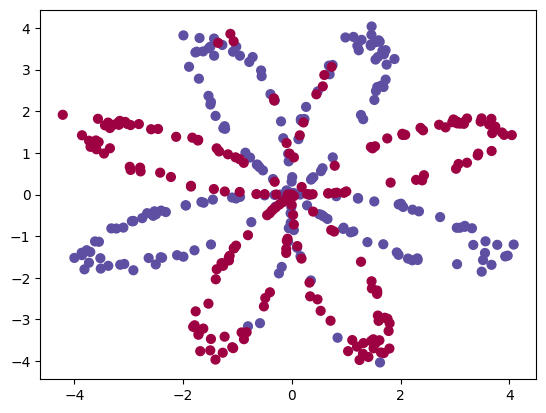

In [ ]:
# Load the data
planarDataObj = PlanarDataset()
X, Y = planarDataObj.get_all_data()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

change **self.Y[ix] = random.randint(0, 1)** to **self.Y[ix] =j**

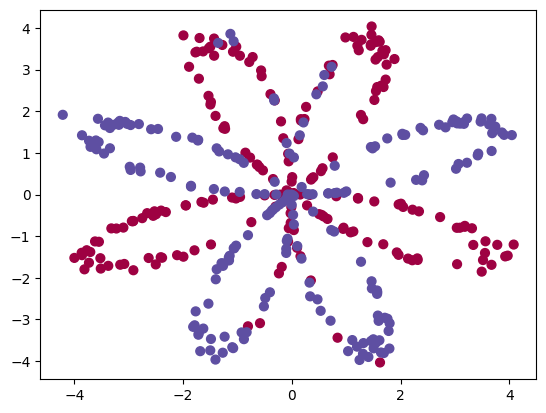

In [4]:
# Load the data
planarDataObj = PlanarDataset()
X, Y = planarDataObj.get_all_data()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Model definition and optimization

Functions bellow define a version of neural network with a single hidden layer, from Section "Behaviour of neural networks", using PyTorch functions. Note that similarly to above this code is not bug-free.

epoch[0] = 0.00465938
epoch[10] = 0.00423922
epoch[20] = 0.00423001
epoch[30] = 0.00417588
epoch[40] = 0.00415665
epoch[50] = 0.00422961
epoch[60] = 0.00422053
epoch[70] = 0.00417085
epoch[80] = 0.00416156
epoch[90] = 0.00423089
epoch[100] = 0.00417832
epoch[110] = 0.00419891
epoch[120] = 0.00410691
epoch[130] = 0.00411157
epoch[140] = 0.00420155
epoch[150] = 0.00424444
epoch[160] = 0.00409792
epoch[170] = 0.00412726
epoch[180] = 0.00414790
epoch[190] = 0.00413421
epoch[200] = 0.00409118
epoch[210] = 0.00405524
epoch[220] = 0.00408754
epoch[230] = 0.00408160
epoch[240] = 0.00404648
epoch[250] = 0.00414845
epoch[260] = 0.00409647
epoch[270] = 0.00405215
epoch[280] = 0.00404929
epoch[290] = 0.00399011


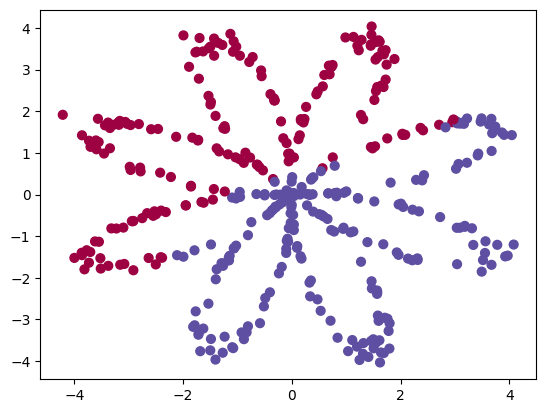

In [ ]:
hidden_state_size = 5;

# Define a model and loss
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():
    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1)
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]

    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 2:** Remove all sources of randomness from the code

Note that while it is clear that the code above isn't performing as expected (loss does not go down) with every run of the cell you should see a slightly different result and order of loss values. This is because of inherent randomness in the code. While the randomness is good when learning (avoids biases) it is bad when debugging for obvious reasons. Modify the code above to make sure it executes the same way every time you run it. For this you will want to make use of the function below and also fix the randomness in dataloader.

**Note:** Use the function below as well as look at ensuring that the order of data in the dataloader remains fixed. You may want to consult PyTorch guidelines on reproducibility https://pytorch.org/docs/stable/notes/randomness.html.

epoch[0] = 0.00525248
epoch[10] = 0.00444227
epoch[20] = 0.00439322
epoch[30] = 0.00438800
epoch[40] = 0.00438636
epoch[50] = 0.00438559
epoch[60] = 0.00438509
epoch[70] = 0.00438467
epoch[80] = 0.00438428
epoch[90] = 0.00438390
epoch[100] = 0.00438352
epoch[110] = 0.00438315
epoch[120] = 0.00438277
epoch[130] = 0.00438240
epoch[140] = 0.00438202
epoch[150] = 0.00438165
epoch[160] = 0.00438127
epoch[170] = 0.00438089
epoch[180] = 0.00438051
epoch[190] = 0.00438014
epoch[200] = 0.00437976
epoch[210] = 0.00437938
epoch[220] = 0.00437901
epoch[230] = 0.00437863
epoch[240] = 0.00437825
epoch[250] = 0.00437787
epoch[260] = 0.00437750
epoch[270] = 0.00437712
epoch[280] = 0.00437674
epoch[290] = 0.00437637


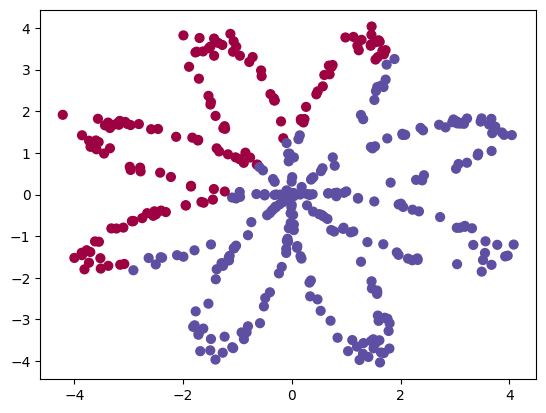

In [5]:
def fix_seeds():
    random_seed = 1      # or could be any of your favorite number
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)


# Copy the code from Section Model definition and optimization and modify accordingly

# Call the fix_seeds() function to fix the seeds
fix_seeds()

hidden_state_size = 5;

# Define a model and loss
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():
    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1)
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]

    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 3:** Train with minimal amount of data

It may still be difficult to identify what is wrong based on results in Section "Remove all sources of randomness from the code". A really good strategy, especially for model debugging, is to try optimizing with a single example/sample. Modify the code from Section "Remove all sources of randomness from the code" in order to do this. Once you do and run it, it should be obvious that there is a bug in your code and what that bug might be.

epoch[0] = 0.01224655
epoch[10] = 0.00947780
epoch[20] = 0.00938970
epoch[30] = 0.00937223
epoch[40] = 0.00936677
epoch[50] = 0.00936421
epoch[60] = 0.00936243
epoch[70] = 0.00936088
epoch[80] = 0.00935943
epoch[90] = 0.00935802
epoch[100] = 0.00935665
epoch[110] = 0.00935530
epoch[120] = 0.00935397
epoch[130] = 0.00935266
epoch[140] = 0.00935135
epoch[150] = 0.00935006
epoch[160] = 0.00934877
epoch[170] = 0.00934748
epoch[180] = 0.00934620
epoch[190] = 0.00934492
epoch[200] = 0.00934364
epoch[210] = 0.00934237
epoch[220] = 0.00934109
epoch[230] = 0.00933981
epoch[240] = 0.00933853
epoch[250] = 0.00933724
epoch[260] = 0.00933596
epoch[270] = 0.00933468
epoch[280] = 0.00933339
epoch[290] = 0.00933210


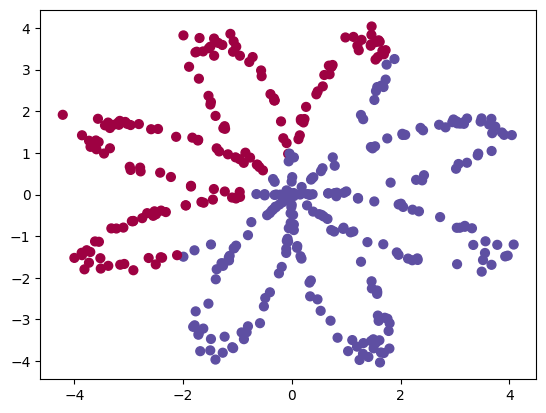

In [6]:
# Copy the code from Section "Remove all sources of randomness from the code" and modify to run with batch size of 1 and only one / same batch used in each epoch.
def fix_seeds():
    random_seed = 1      # or could be any of your favorite number
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)


# Copy the code from Section Model definition and optimization and modify accordingly

# Call the fix_seeds() function to fix the seeds
fix_seeds()

hidden_state_size = 5;

# Define a model and loss
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():
    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1)
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize =32

# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]

    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

epoch[0] = 0.01224524
epoch[10] = 0.00897139
epoch[20] = 0.00859822
epoch[30] = 0.00838779
epoch[40] = 0.00797148
epoch[50] = 0.00619695
epoch[60] = 0.00503713
epoch[70] = 0.00457074
epoch[80] = 0.00433792
epoch[90] = 0.00419532
epoch[100] = 0.00409548
epoch[110] = 0.00401962
epoch[120] = 0.00395894
epoch[130] = 0.00390875
epoch[140] = 0.00386622
epoch[150] = 0.00382950
epoch[160] = 0.00379730
epoch[170] = 0.00376872
epoch[180] = 0.00374306
epoch[190] = 0.00371982
epoch[200] = 0.00369861
epoch[210] = 0.00367910
epoch[220] = 0.00366105
epoch[230] = 0.00364427
epoch[240] = 0.00362858
epoch[250] = 0.00361386
epoch[260] = 0.00359998
epoch[270] = 0.00358685
epoch[280] = 0.00357439
epoch[290] = 0.00356252


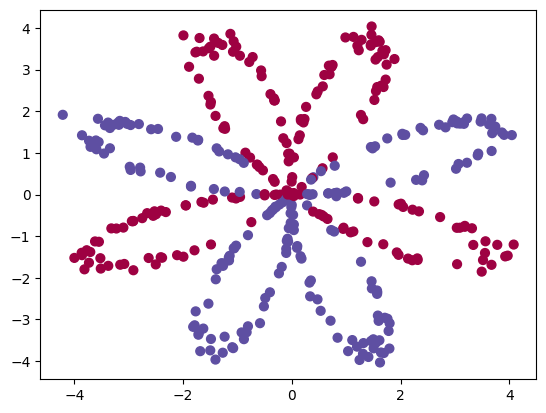

In [7]:
# Once you find the bug, fix it here and make sure you can effectively reproduce the result in Section "Behaviour of neural networks"
fix_seeds()

hidden_state_size = 5;

# Define a model and loss
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():
    param.requires_grad = True
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1)
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize =32

# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]

    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 4:** Use Tensorboard or similar.

At this point the model and training code should be correct and you should be able to train the model. However, the hyperparameters may still not be optimal. For hyperparameter tuning and to log many experiments it is advisable to use some way to visualise the training process. Tensorboard provides such ability. Another alternative is Weights & Biases.  

Let’s now try using TensorBoard with PyTorch! Before logging anything, we need to create a SummaryWriter instance. Writer will output to ./runs/ directory by default.

In [2]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

We can use `add_scalar(tag, scalar_value, global_step=None, walltime=None)` to log scalar values (e.g. loss). We have to call `flush()` method to make sure that all pending events have been written to disk. Finally if we do not need the summary writer anymore, then call `close()` method.

Your next task is to slightly modify the code to log the Loss and Accuracy into the Tesnorboard log file. This will require modifying the training loop as follows:

```
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad()

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += output.argmax(dim=1).eq(target).sum().item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
    
    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()
```




In [8]:
# Insert your code here
from torch.utils.tensorboard import SummaryWriter

# Set hyperparameters
learning_rate = 0.05
num_epochs = 300
batchsize = 16

# Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Set up the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Create a SummaryWriter object
writer = SummaryWriter("runs/experiment")

# Training loop
for epoch in range(num_epochs):
  running_loss = 0.0
  total_correct = 0
  for iter, data in enumerate(train_loader):
    # Get data for the minibatch
    input,target = data

    # We have to set gradients to zero at the start of every iteration
    optimizer.zero_grad()

    # Forward pass through the model
    output = model(input)
    output_sup=(output>0.5).float()
    loss = MSELoss(output,target)
    running_loss += loss.item()
    #total_correct += output.argmax(dim=1).eq(target).sum().item()
    total_correct +=(output_sup.eq(target)).sum().item()

    # Backpropagation
    loss.backward()
    optimizer.step()

  # Log accuracy and loss
  writer.add_scalar("Loss/train", running_loss, epoch)
  writer.add_scalar("Accuracy", total_correct / dataset_size, epoch)

  if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()

epoch[0] = 0.00602943
epoch[10] = 0.00600525
epoch[20] = 0.00597620
epoch[30] = 0.00597576
epoch[40] = 0.00595074
epoch[50] = 0.00598482
epoch[60] = 0.00592398
epoch[70] = 0.00590431
epoch[80] = 0.00589047
epoch[90] = 0.00587067
epoch[100] = 0.00590376
epoch[110] = 0.00586777
epoch[120] = 0.00583411
epoch[130] = 0.00583116
epoch[140] = 0.00581641
epoch[150] = 0.00580325
epoch[160] = 0.00579062
epoch[170] = 0.00582354
epoch[180] = 0.00575860
epoch[190] = 0.00581825
epoch[200] = 0.00575076
epoch[210] = 0.00575140
epoch[220] = 0.00570916
epoch[230] = 0.00569213
epoch[240] = 0.00570042
epoch[250] = 0.00567919
epoch[260] = 0.00568718
epoch[270] = 0.00567930
epoch[280] = 0.00565045
epoch[290] = 0.00563605


Now install the tensorboard

In [9]:
!pip install tensorboard

Now to start tensorboard in google colab we can run following command.

In [10]:
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>